# LSTM

Reference linked [here](https://towardsdatascience.com/nlp-spam-detection-in-sms-text-data-using-deep-learning-b8632db85cc8).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten

In [10]:
sms = pd.read_csv('/content/drive/Shareddrives/CS263 Project/spam.csv', encoding='ISO-8859-1', usecols = ['v1', 'v2']) 
sms.columns = ['label', 'message']
sms

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
sms.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [13]:
sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})
sms

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
X_train, X_test, y_train, y_test = train_test_split(sms['message'], sms['label'], test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [43]:
tokenizer = Tokenizer(num_words=500, char_level=False, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'to': 3,
 'you': 4,
 'a': 5,
 'the': 6,
 'u': 7,
 'and': 8,
 'in': 9,
 'is': 10,
 'me': 11,
 'my': 12,
 'for': 13,
 'your': 14,
 'it': 15,
 'of': 16,
 'call': 17,
 'have': 18,
 '2': 19,
 'on': 20,
 'now': 21,
 'that': 22,
 'are': 23,
 'so': 24,
 'but': 25,
 'not': 26,
 'or': 27,
 'do': 28,
 'can': 29,
 'at': 30,
 'ur': 31,
 "i'm": 32,
 'will': 33,
 'be': 34,
 'if': 35,
 'no': 36,
 'get': 37,
 'with': 38,
 'just': 39,
 'we': 40,
 'this': 41,
 'lt': 42,
 'gt': 43,
 'from': 44,
 'up': 45,
 'when': 46,
 '4': 47,
 'free': 48,
 'go': 49,
 'how': 50,
 'out': 51,
 'ok': 52,
 'what': 53,
 'all': 54,
 'know': 55,
 'got': 56,
 'good': 57,
 'then': 58,
 'like': 59,
 'was': 60,
 'its': 61,
 'come': 62,
 'day': 63,
 'only': 64,
 'am': 65,
 'time': 66,
 'love': 67,
 'want': 68,
 'he': 69,
 'there': 70,
 'send': 71,
 'one': 72,
 'txt': 73,
 'as': 74,
 'need': 75,
 'stop': 76,
 'about': 77,
 'going': 78,
 'r': 79,
 'home': 80,
 'text': 81,
 'sorry': 82,
 'by': 83,
 'lor': 84,
 'n

In [44]:
max_len = 50

train_sequences = tokenizer.texts_to_sequences(X_train)
train_sequences = pad_sequences(train_sequences, maxlen=max_len, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences = pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

In [45]:
print(train_sequences.shape, test_sequences.shape)
print(train_sequences[0])

(4457, 50) (1115, 50)
[  1 204  10   1 402  47   7   8 331 109   1   5   1  66   3 139   7 155
 332 326 471 374 300  31   1   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [55]:
vocab_size = 500 
embedding_dim = 16

# LSTM hyperparameters
n_lstm = 20
drop_lstm = 0.2

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [67]:
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(train_sequences, y_train, epochs=num_epochs, validation_split=0.1, verbose=2)

Epoch 1/10
126/126 - 13s - loss: 0.0121 - accuracy: 0.9965 - precision: 0.9944 - recall: 0.9796 - val_loss: 0.0083 - val_accuracy: 0.9955 - val_precision: 1.0000 - val_recall: 0.9661 - 13s/epoch - 100ms/step
Epoch 2/10
126/126 - 6s - loss: 0.0110 - accuracy: 0.9978 - precision: 0.9926 - recall: 0.9907 - val_loss: 0.0124 - val_accuracy: 0.9955 - val_precision: 1.0000 - val_recall: 0.9661 - 6s/epoch - 46ms/step
Epoch 3/10
126/126 - 7s - loss: 0.0092 - accuracy: 0.9975 - precision: 0.9944 - recall: 0.9870 - val_loss: 0.0229 - val_accuracy: 0.9910 - val_precision: 1.0000 - val_recall: 0.9322 - 7s/epoch - 55ms/step
Epoch 4/10
126/126 - 6s - loss: 0.0080 - accuracy: 0.9978 - precision: 0.9926 - recall: 0.9907 - val_loss: 0.0438 - val_accuracy: 0.9888 - val_precision: 1.0000 - val_recall: 0.9153 - 6s/epoch - 46ms/step
Epoch 5/10
126/126 - 6s - loss: 0.0098 - accuracy: 0.9975 - precision: 0.9962 - recall: 0.9852 - val_loss: 0.0216 - val_accuracy: 0.9933 - val_precision: 1.0000 - val_recall: 0.

In [69]:
final = model.evaluate(test_sequences, y_test, verbose=2)

35/35 - 0s - loss: 0.1157 - accuracy: 0.9785 - precision: 0.9630 - recall: 0.8725 - 434ms/epoch - 12ms/step


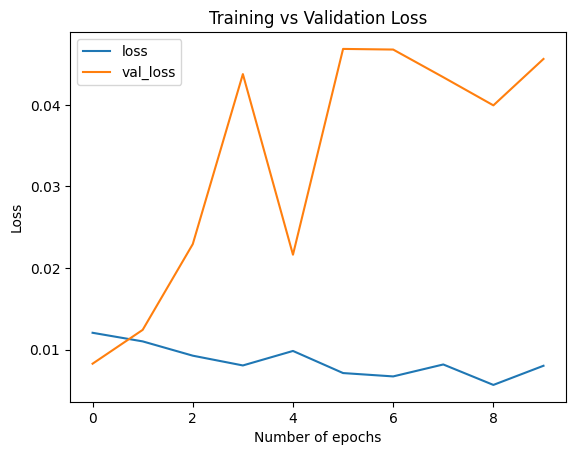

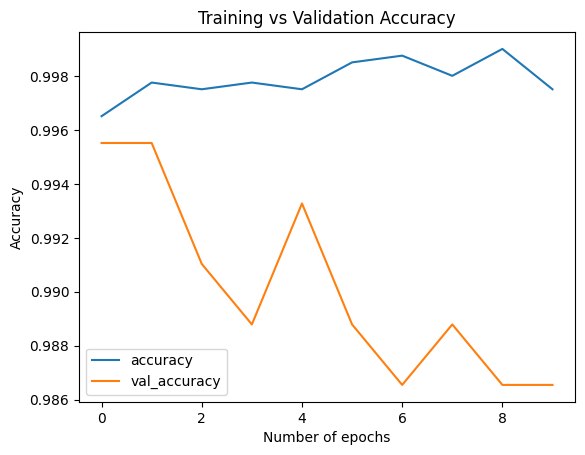

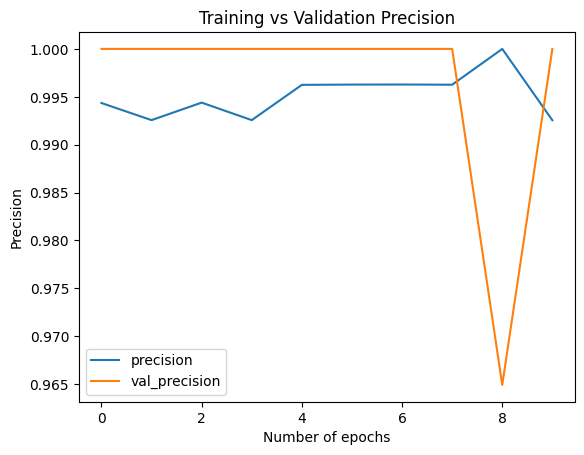

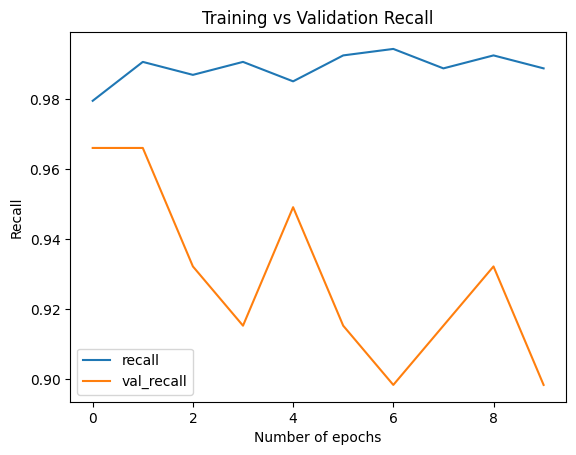

In [71]:
metrics = pd.DataFrame(history.history)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training vs Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs('loss', 'val_loss', 'Loss')
plot_graphs('accuracy', 'val_accuracy', 'Accuracy')
plot_graphs('precision', 'val_precision', 'Precision')
plot_graphs('recall', 'val_recall', 'Recall')

# BERT

1. Analytics Vidhya [article](https://www.analyticsvidhya.com/blog/2021/09/performing-email-spam-detection-using-bert-in-python/)
2. TensorFlow [tutorial](https://www.tensorflow.org/text/tutorials/classify_text_with_bert)


ChatGPT help:

Q: how do i implement text spam classification with bert

A: To implement text spam classification with BERT, you can follow these general steps:

1. Preprocessing:
  - Clean and preprocess your text data by removing any unnecessary characters, stopwords, or special symbols.
  - Split your dataset into training and testing sets.
2. Tokenization:
  - Tokenize your text data into BERT-compatible tokens. You can use libraries like the Transformers library from Hugging Face, which provides a tokenizer specifically for BERT models.
  - Convert your text data into token IDs that BERT can understand.
3. Model Setup:
  - Load the BERT model architecture and pre-trained weights using the Transformers library.
  - Fine-tune the pre-trained BERT model for text classification by adding a classification layer on top.
4. Training:
  - Train the BERT model on your labeled training dataset.
  - During training, you'll need to define your loss function (e.g., cross-entropy) and optimizer (e.g., Adam).
5. Evaluation:
  - Evaluate the performance of your trained model on the testing dataset.
  - Calculate metrics such as accuracy, precision, recall, and F1-score to assess the model's performance.
6. Prediction:
  - Once your model is trained and evaluated, you can use it to make predictions on new, unseen text data.
  - Tokenize and preprocess the new text data, and then pass it through your trained BERT model to obtain predictions.

It's worth noting that implementing text spam classification with BERT can require significant computational resources, especially if you have a large dataset. Training BERT from scratch can be computationally expensive and time-consuming. Therefore, it is common to use pre-trained BERT models and fine-tune them on your specific task, which helps save time and resources.

Using popular libraries like Transformers can greatly simplify the process of implementing BERT-based models for text classification. The library provides pre-trained BERT models, tokenizers, and utilities for fine-tuning on various tasks. You can refer to the official Transformers library documentation and examples for more specific code implementations and detailed instructions based on the programming language of your choice.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# BERT
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

# model
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
sms = pd.read_csv('/content/drive/Shareddrives/CS263 Project/spam.csv', encoding='ISO-8859-1', usecols = ['v1', 'v2']) 
sms.columns = ['label', 'message']

sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})
sms

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
X_train, X_test, y_train, y_test = train_test_split(sms['message'], sms['label'], test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [47]:
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3') # tokenizer
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1') # pretrained BERT model

In [48]:
input = Input(shape=(), dtype=tf.string)
tokens = bert_preprocessor(input)
embedding = bert_encoder(tokens)
dropout = Dropout(0.2)(embedding['pooled_output'])
output = Dense(1, activation='sigmoid')(dropout)
model = Model(input, output)

In [49]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_12 (KerasLayer)    {'input_mask': (Non  0           ['input_5[0][0]']                
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [50]:
num_epochs = 5

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(X_train, y_train, batch_size=32, epochs=num_epochs, validation_split=0.1, verbose=1)

Epoch 1/5
126/126 [==============================] - 401s 3s/step - loss: 0.3036 - accuracy: 0.8721 - precision: 0.5736 - recall: 0.2085 - val_loss: 0.1690 - val_accuracy: 0.9372 - val_precision: 0.9615 - val_recall: 0.4808
Epoch 2/5
126/126 [==============================] - 392s 3s/step - loss: 0.1459 - accuracy: 0.9516 - precision: 0.9416 - recall: 0.6845 - val_loss: 0.1276 - val_accuracy: 0.9641 - val_precision: 0.9091 - val_recall: 0.7692
Epoch 3/5
126/126 [==============================] - 392s 3s/step - loss: 0.1128 - accuracy: 0.9636 - precision: 0.9195 - recall: 0.8007 - val_loss: 0.1096 - val_accuracy: 0.9686 - val_precision: 0.9130 - val_recall: 0.8077
Epoch 4/5
126/126 [==============================] - 395s 3s/step - loss: 0.0946 - accuracy: 0.9696 - precision: 0.9286 - recall: 0.8395 - val_loss: 0.0998 - val_accuracy: 0.9686 - val_precision: 0.9130 - val_recall: 0.8077
Epoch 5/5
126/126 [==============================] - 401s 3s/step - loss: 0.0861 - accuracy: 0.9723 - pr

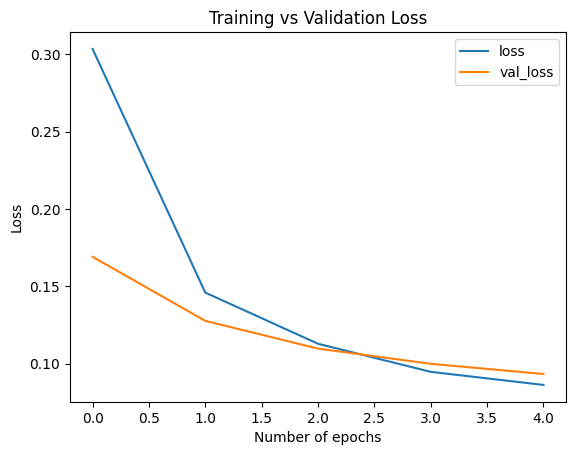

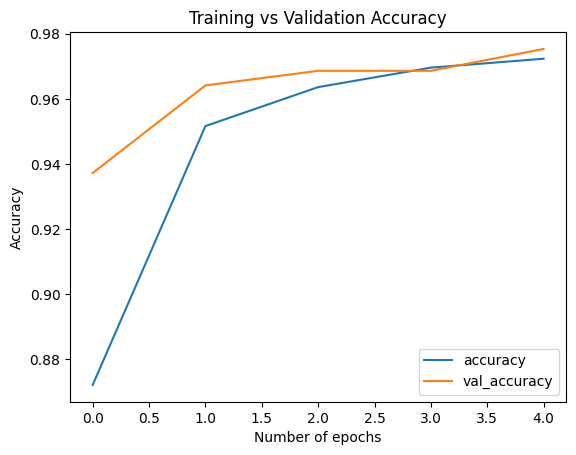

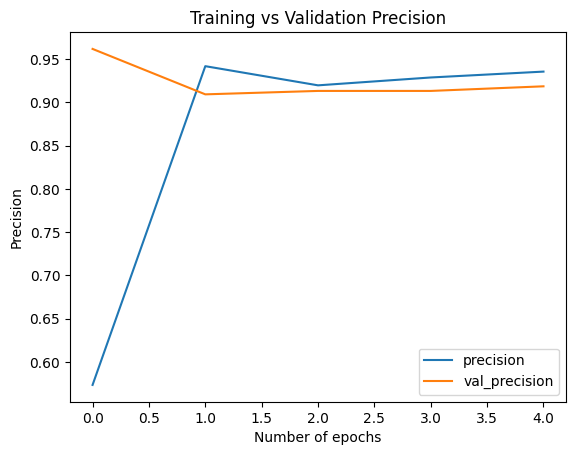

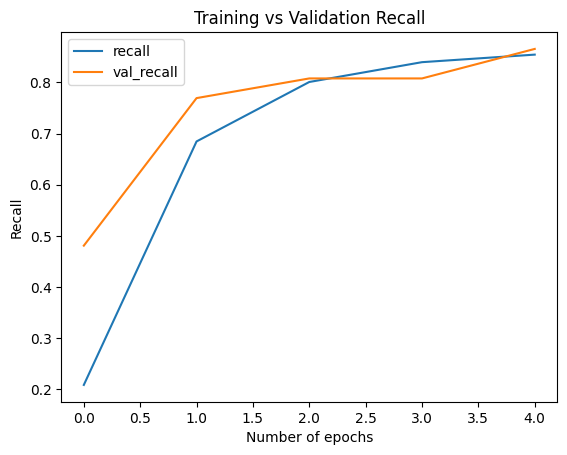

In [53]:
metrics = pd.DataFrame(history.history)

def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training vs Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs('loss', 'val_loss', 'Loss')
plot_graphs('accuracy', 'val_accuracy', 'Accuracy')
plot_graphs('precision', 'val_precision', 'Precision')
plot_graphs('recall', 'val_recall', 'Recall')

LSTM: 

35/35 - 0s - loss: 0.1157 - accuracy: 0.9785 - precision: 0.9630 - recall: 0.8725 - 434ms/epoch - 12ms/step

In [51]:
# BERT SMALL
final = model.evaluate(X_test, y_test, verbose=2)

35/35 - 97s - loss: 0.0804 - accuracy: 0.9794 - precision: 0.9710 - recall: 0.8758 - 97s/epoch - 3s/step


In [54]:
# BERT TINY
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3') # tokenizer
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1') # pretrained BERT model

input = Input(shape=(), dtype=tf.string)
tokens = bert_preprocessor(input)
embedding = bert_encoder(tokens)
dropout = Dropout(0.2)(embedding['pooled_output'])
output = Dense(1, activation='sigmoid')(dropout)
model = Model(input, output)

model.summary()

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f26087ac670>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_15 (KerasLayer)    {'input_word_ids':   0           ['input_6[0][0]']                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [55]:
num_epochs = 5

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.1, verbose=1)

Epoch 1/5
126/126 [==============================] - 28s 190ms/step - loss: 0.4176 - accuracy: 0.8549 - precision: 0.0238 - recall: 0.0018 - val_loss: 0.3049 - val_accuracy: 0.8834 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
126/126 [==============================] - 30s 238ms/step - loss: 0.2714 - accuracy: 0.8798 - precision: 0.8409 - recall: 0.1365 - val_loss: 0.2245 - val_accuracy: 0.9013 - val_precision: 0.9000 - val_recall: 0.1731
Epoch 3/5
126/126 [==============================] - 28s 221ms/step - loss: 0.2026 - accuracy: 0.9205 - precision: 0.9055 - recall: 0.4594 - val_loss: 0.1912 - val_accuracy: 0.9439 - val_precision: 0.9091 - val_recall: 0.5769
Epoch 4/5
126/126 [==============================] - 26s 203ms/step - loss: 0.1739 - accuracy: 0.9387 - precision: 0.8854 - recall: 0.6273 - val_loss: 0.1723 - val_accuracy: 0.9439 - val_precision: 0.8857 - val_recall: 0.5962
Epoch 5/5
126/126 [==============================] - 28s 225ms/step - loss: 0.1548 - acc

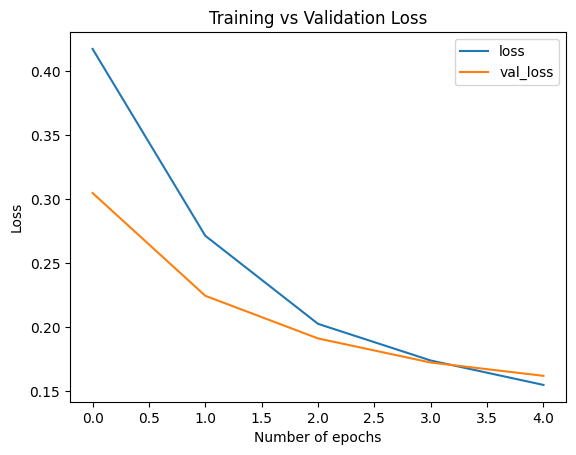

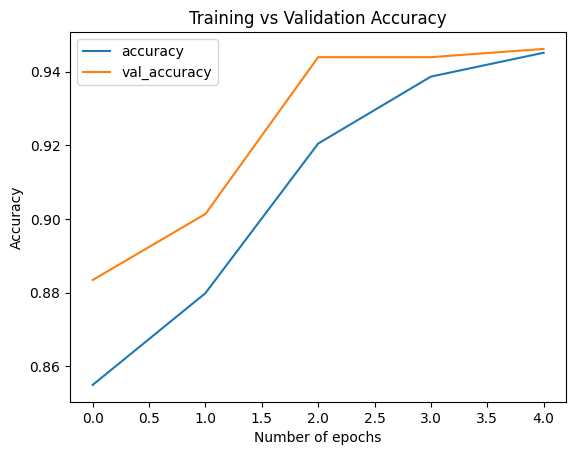

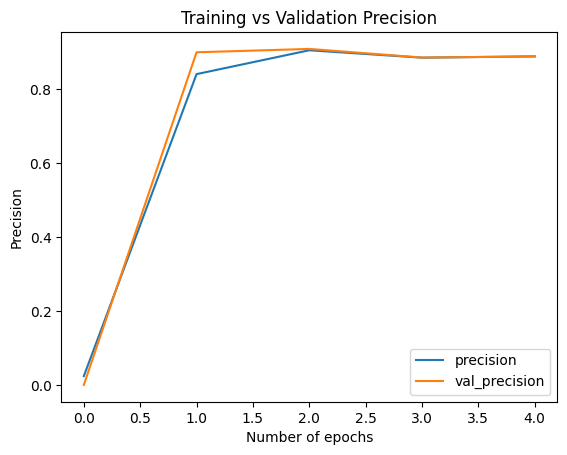

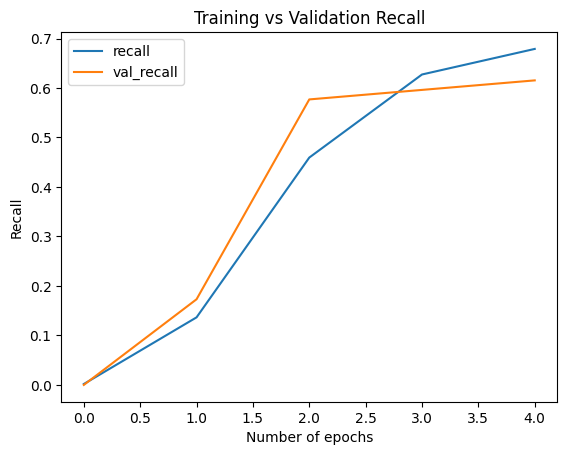

In [56]:
metrics = pd.DataFrame(history.history)

plot_graphs('loss', 'val_loss', 'Loss')
plot_graphs('accuracy', 'val_accuracy', 'Accuracy')
plot_graphs('precision', 'val_precision', 'Precision')
plot_graphs('recall', 'val_recall', 'Recall')

LSTM: 

35/35 - 0s - loss: 0.1157 - accuracy: 0.9785 - precision: 0.9630 - recall: 0.8725 - 434ms/epoch - 12ms/step

BERT SMALL

35/35 - 97s - loss: 0.0804 - accuracy: 0.9794 - precision: 0.9710 - recall: 0.8758 - 97s/epoch - 3s/step



In [57]:
# BERT TINY
final = model.evaluate(X_test, y_test, verbose=2)

35/35 - 7s - loss: 0.1369 - accuracy: 0.9561 - precision: 0.9127 - recall: 0.7516 - 7s/epoch - 192ms/step


In [58]:
# ALBERT BASE
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/albert_en_preprocess/3') # tokenizer
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/albert_en_base/2') # pretrained BERT model

input = Input(shape=(), dtype=tf.string)
tokens = bert_preprocessor(input)
embedding = bert_encoder(tokens)
dropout = Dropout(0.2)(embedding['pooled_output'])
output = Dense(1, activation='sigmoid')(dropout)
model = Model(input, output)

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_17 (KerasLayer)    {'input_word_ids':   0           ['input_7[0][0]']                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [59]:
num_epochs = 5

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.1, verbose=1)

Epoch 1/5
126/126 [==============================] - 2424s 19s/step - loss: 0.3067 - accuracy: 0.8748 - precision: 0.6429 - recall: 0.1661 - val_loss: 0.2025 - val_accuracy: 0.9238 - val_precision: 0.8462 - val_recall: 0.4231
Epoch 2/5
126/126 [==============================] - 2411s 19s/step - loss: 0.1889 - accuracy: 0.9277 - precision: 0.8443 - recall: 0.5701 - val_loss: 0.1553 - val_accuracy: 0.9372 - val_precision: 0.8529 - val_recall: 0.5577
Epoch 3/5
126/126 [==============================] - 2429s 19s/step - loss: 0.1462 - accuracy: 0.9476 - precision: 0.8952 - recall: 0.6937 - val_loss: 0.1335 - val_accuracy: 0.9439 - val_precision: 0.8462 - val_recall: 0.6346
Epoch 4/5
126/126 [==============================] - 2450s 19s/step - loss: 0.1289 - accuracy: 0.9584 - precision: 0.9121 - recall: 0.7657 - val_loss: 0.1195 - val_accuracy: 0.9507 - val_precision: 0.8947 - val_recall: 0.6538
Epoch 5/5
126/126 [==============================] - 2354s 19s/step - loss: 0.1189 - accuracy: 0

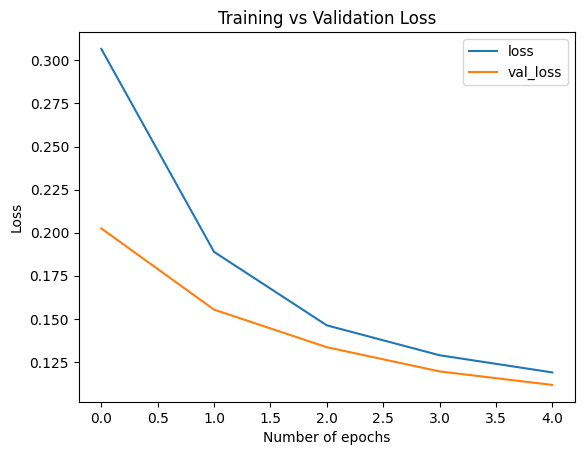

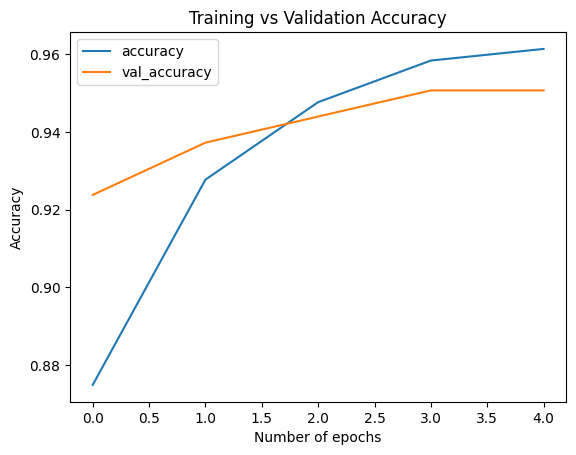

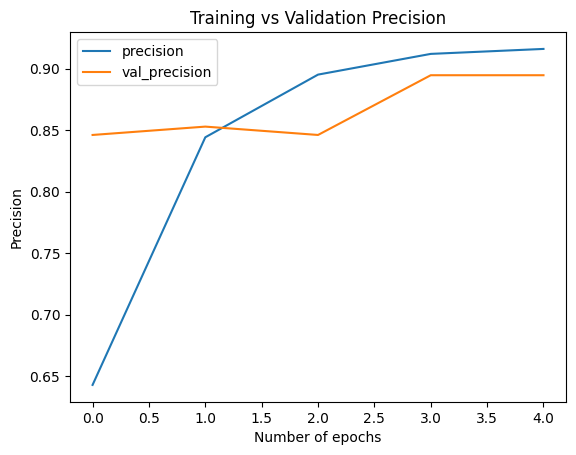

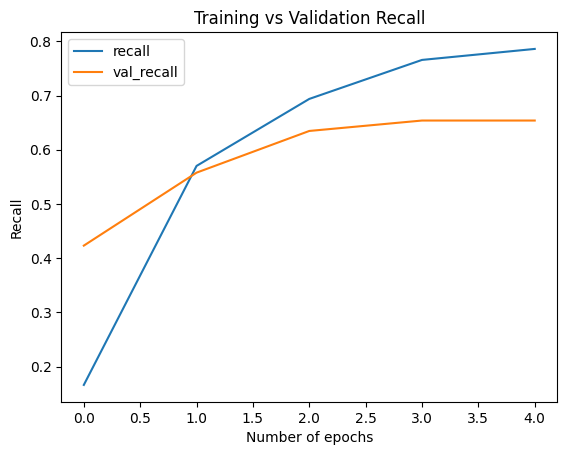

In [60]:
metrics = pd.DataFrame(history.history)

plot_graphs('loss', 'val_loss', 'Loss')
plot_graphs('accuracy', 'val_accuracy', 'Accuracy')
plot_graphs('precision', 'val_precision', 'Precision')
plot_graphs('recall', 'val_recall', 'Recall')

LSTM: 

35/35 - 0s - loss: 0.1157 - accuracy: 0.9785 - precision: 0.9630 - recall: 0.8725 - 434ms/epoch - 12ms/step

BERT SMALL

35/35 - 97s - loss: 0.0804 - accuracy: 0.9794 - precision: 0.9710 - recall: 0.8758 - 97s/epoch - 3s/step

BERT TINY

35/35 - 7s - loss: 0.1369 - accuracy: 0.9561 - precision: 0.9127 - recall: 0.7516 - 7s/epoch - 192ms/step

In [61]:
# ALBERT BASE
final = model.evaluate(X_test, y_test, verbose=2)

35/35 - 590s - loss: 0.1187 - accuracy: 0.9543 - precision: 0.9722 - recall: 0.6863 - 590s/epoch - 17s/step


In [62]:
# BERT BASE
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3') # tokenizer
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1') # pretrained BERT model

input = Input(shape=(), dtype=tf.string)
tokens = bert_preprocessor(input)
embedding = bert_encoder(tokens)
dropout = Dropout(0.2)(embedding['pooled_output'])
output = Dense(1, activation='sigmoid')(dropout)
model = Model(input, output)

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer_19 (KerasLayer)    {'input_type_ids':   0           ['input_8[0][0]']                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [63]:
num_epochs = 5

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])
history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.1, verbose=1)

Epoch 1/5
126/126 [==============================] - 2380s 19s/step - loss: 0.2930 - accuracy: 0.8793 - precision: 0.7014 - recall: 0.1863 - val_loss: 0.1846 - val_accuracy: 0.9417 - val_precision: 0.9333 - val_recall: 0.5385
Epoch 2/5
126/126 [==============================] - 2371s 19s/step - loss: 0.1591 - accuracy: 0.9484 - precision: 0.9306 - recall: 0.6679 - val_loss: 0.1339 - val_accuracy: 0.9439 - val_precision: 0.9355 - val_recall: 0.5577
Epoch 3/5
126/126 [==============================] - 2369s 19s/step - loss: 0.1212 - accuracy: 0.9651 - precision: 0.9408 - recall: 0.7915 - val_loss: 0.1182 - val_accuracy: 0.9664 - val_precision: 0.8776 - val_recall: 0.8269
Epoch 4/5
126/126 [==============================] - 2460s 20s/step - loss: 0.1051 - accuracy: 0.9691 - precision: 0.9354 - recall: 0.8284 - val_loss: 0.1015 - val_accuracy: 0.9686 - val_precision: 0.9130 - val_recall: 0.8077
Epoch 5/5
126/126 [==============================] - 2407s 19s/step - loss: 0.0889 - accuracy: 0

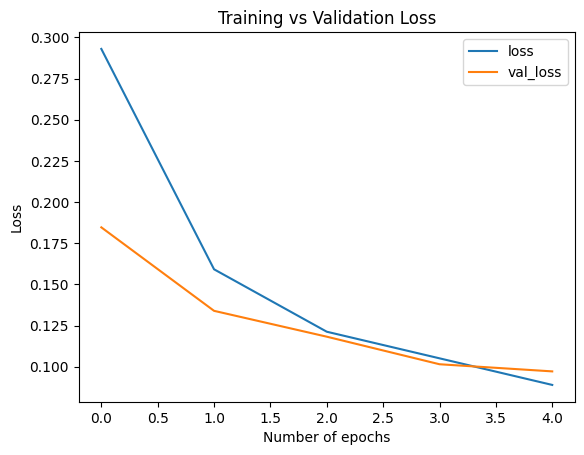

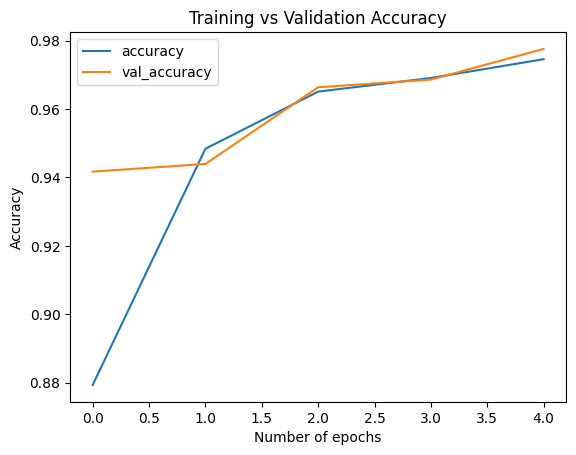

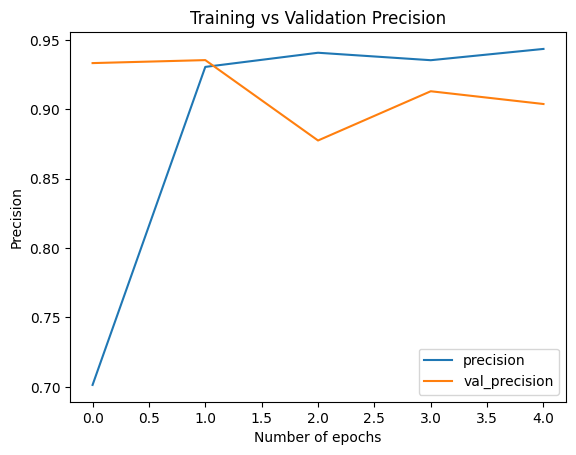

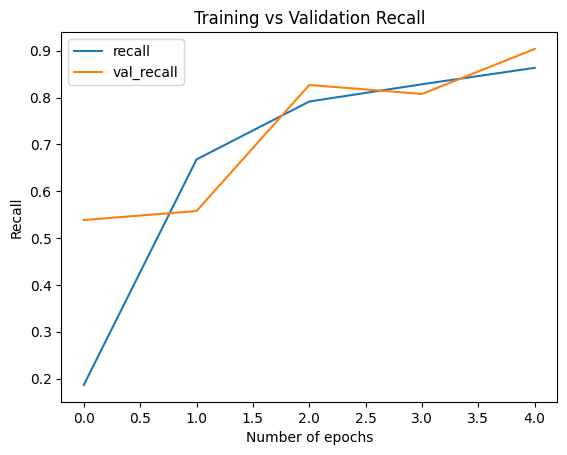

In [64]:
metrics = pd.DataFrame(history.history)

plot_graphs('loss', 'val_loss', 'Loss')
plot_graphs('accuracy', 'val_accuracy', 'Accuracy')
plot_graphs('precision', 'val_precision', 'Precision')
plot_graphs('recall', 'val_recall', 'Recall')

LSTM: 

35/35 - 0s - loss: 0.1157 - accuracy: 0.9785 - precision: 0.9630 - recall: 0.8725 - 434ms/epoch - 12ms/step

BERT SMALL

35/35 - 97s - loss: 0.0804 - accuracy: 0.9794 - precision: 0.9710 - recall: 0.8758 - 97s/epoch - 3s/step

BERT TINY

35/35 - 7s - loss: 0.1369 - accuracy: 0.9561 - precision: 0.9127 - recall: 0.7516 - 7s/epoch - 192ms/step

ALBERT BASE

35/35 - 590s - loss: 0.1187 - accuracy: 0.9543 - precision: 0.9722 - recall: 0.6863 - 590s/epoch - 17s/step

In [65]:
# BERT BASE
final = model.evaluate(X_test, y_test, verbose=2)

35/35 - 593s - loss: 0.0828 - accuracy: 0.9803 - precision: 0.9226 - recall: 0.9346 - 593s/epoch - 17s/step
